In [1]:
#Install libraries
!pip install matplotlib
!pip install yfinance
!pip install seaborn
!pip install numpy
!pip install requirements.txt
!pip install quandl
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
#, cross_validation, svm
from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from functools import reduce
import altair as alt
import ipywidgets as widgets
import json
from vega_datasets import data


In [3]:

#@title Enter your start and end date
start_date = "2009-08-01" #@param {type:"date"}
end_date = "2022-08-01" #@param {type:"date"}
input = "SPY" #@param {type:"string"}


**List of top 10**

In [4]:


df = yf.Ticker(input)
df2 = pd.DataFrame(df.info['holdings'])
top_10_list = list(df2['symbol'])
top_10_list.append(input) 
top_10_list = [str(stock).split('.')[0] for stock in top_10_list]
top_10_list


['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'GOOGL',
 'GOOG',
 'BRK',
 'TSLA',
 'NVDA',
 'JPM',
 'SPY']

Function to get yearly

In [9]:
def get_yearly(stock_name, start_date, end_date):
    
  df = yf.download(stock_name, start = start_date, end = end_date)

  df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
  df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

  df = df[['Adj Close', 'HL_PCT', 'PCT_change','Volume']]
  #print(df)
  
  forecast_col= 'Adj Close'
  #forecast_col = 'Adj. Close'
  df.fillna(value=-99999, inplace=True)
  forecast_out = int(math.ceil(0.2 * len(df)))
  df['label'] = df[forecast_col].shift(-forecast_out)
  #print(df.head())

  X = np.array(df.drop(['label'], 1))
  X = preprocessing.scale(X)
  X_lately = X[-forecast_out:]
  X = X[:-forecast_out]
  df.dropna(inplace=True)
  
  y = np.array(df['label'])
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  #clf =  svm.SVR() # #LinearRegression()
  clf =  LinearRegression()
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  #print(confidence)
  forecast_set = clf.predict(X_lately)
  df['Forecast'] = np.nan
  
  last_date = df.iloc[-1].name
  last_unix = last_date.timestamp()
  one_day = 86400
  next_unix = last_unix + one_day
  
  for i in forecast_set:
      next_date = datetime.datetime.fromtimestamp(next_unix)
      next_unix += 86400
      df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
  
  df['Adj Close'].plot()
  df['Forecast'].plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  #plt.show()
  #print(df['Forecast'])
  table = df['Forecast']
  returns_daily = table.pct_change()
  returns_annual = ((1+ returns_daily.mean())**254) - 1
  print(returns_annual)
  x = df['Forecast'].std()*(254**0.5)
  return returns_annual , x

create list of annual returns 

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.5504847132569428
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.3547835988850976
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.25243028599052675
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

-0.08182508444722825
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.38075549930210006
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.3901476726965549
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.558251590053731
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

1.6621021559494178
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.8283525934406022
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.04911002585047042
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarnin

0.20599196928404906
[1603.6657212263183, 2071.705532731725, 742.407758241417, 934.5457635834448, 882.5599859599278, 910.7373480279078, 0.2919995639674967, 17259.01136069782, 3135.21067366674, 477.59905683931305, 1401.0300840624288]


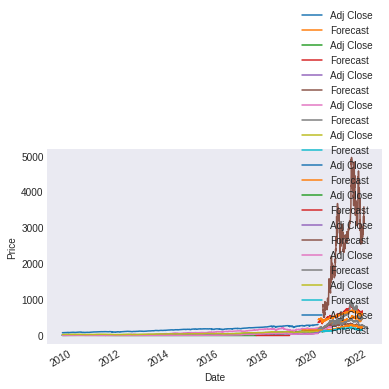

In [10]:
annual_returns = {}

#start_date = '2009-12-1'
#end_date = '2018-06-22'

lst = []
for stock in top_10_list:
  annual_returns[stock] , x = get_yearly(stock, start_date, end_date)
  lst.append(x)

  #annual_returns_df[stock] = get_yearly(stock, start_date, end_date)
  #annual_returns[stock] = get_yearly(stock, start_date, end_date)

annual_returns_df = pd.DataFrame(list(annual_returns.items()),columns = ['Stock name','Annual_returns']) 

#annual_returns_df.set_index(annual_returns_df.keys, drop=True, append=False, inplace=False, verify_integrity=False)

#annual_returns_df
print(lst)




**Markowitz model**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


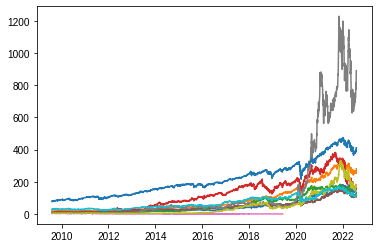

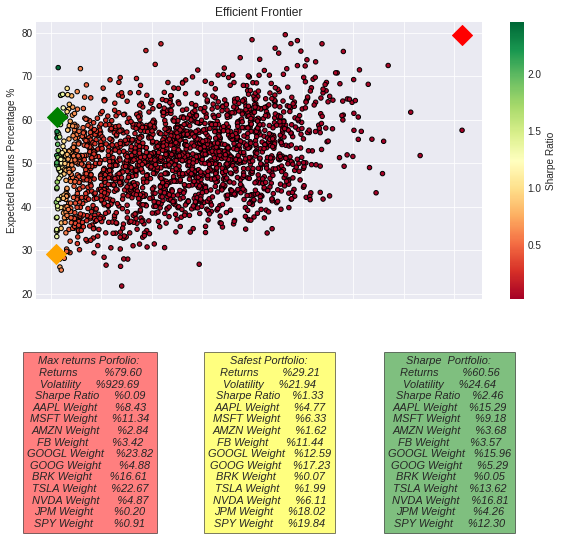

In [7]:
selected = top_10_list
start_year = start_date
end_year = end_date
Num_porSimulation = 2000


#Building the dataframe 
yf.pdr_override()
frame = {}
for stock in selected:
    data_var = pdr.get_data_yahoo(stock, start_year,end_year)['Adj Close']
    data_var.to_frame()
    frame.update({stock: data_var})

import pandas as pd
#Mathematical calculations, creation of 5000 portfolios,
table = pd.DataFrame(frame)
plt.plot(pd.DataFrame(frame))
pd.DataFrame(frame).to_csv('Out.csv') 
returns_daily = table.pct_change()
returns_daily.to_csv('Out1.csv') 

#====================================================================
#returns_annual = ((1+ returns_daily.mean())**254) - 1
returns_annual = annual_returns_df['Annual_returns']
#====================================================================

returns_annual.to_csv('Out2.csv') 

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = Num_porSimulation                                    # Change porfolio numbers here

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns*100)
    port_volatility.append(volatility*100)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility =df['Volatility'].min()
#min_volatility1 = df['Volatility'].min()+1
max_sharpe = df['Sharpe Ratio'].max()
max_return = df['Returns'].max()
max_vol = df['Volatility'].max()
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_returns = df.loc[df['Returns'] == max_return]
max_vols = df.loc[df['Volatility'] == max_vol]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='green', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='orange', marker='D', s=200 )
plt.scatter(x=max_vols['Volatility'], y=max_returns['Returns'], c='red', marker='D', s=200 )
plt.style.use('seaborn-dark')

plt.xlabel('Volatility (Std. Deviation) Percentage %')
plt.ylabel('Expected Returns Percentage %')
plt.title('Efficient Frontier')
plt.subplots_adjust(bottom=0.4)
# ------------------ Pritning 3 optimal Protfolios -----------------------
#Setting max_X, max_Y to act as relative border for window size

red_num = df.index[df["Returns"] == max_return]
yellow_num = df.index[df['Volatility'] == min_volatility]
green_num = df.index[df['Sharpe Ratio'] == max_sharpe]
multseries = pd.Series([1,1,1]+[100 for stock in selected], index=['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected])
with pd.option_context('display.float_format', '%{:,.2f}'.format):
    plt.figtext(0.2, 0.15, "Max returns Porfolio: \n" + df.loc[red_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='red', alpha=0.5), fontsize=11, style='oblique',ha='center', va='center', wrap=True)
    plt.figtext(0.45, 0.15, "Safest Portfolio: \n" + df.loc[yellow_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='yellow', alpha=0.5), fontsize=11, style='oblique', ha='center', va='center', wrap=True)
    plt.figtext(0.7, 0.15, "Sharpe  Portfolio: \n" + df.loc[green_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='green', alpha=0.5), fontsize=11, style='oblique', ha='center', va='center', wrap=True)
plt.show()